In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import scipy.cluster
import scipy.cluster.hierarchy as hierarchy
import psutil

plt.rcParams['figure.figsize'] = (15, 9)
#plt.style.use('ggplot')

In [47]:
import os

def emptyfile_check(file):
    if file.empty:
        print("Файл пустой.")
    else:
        print("Файл не пустой, данные в порядке.")
        
def emptycells_check(data):
    if data.isnull().values.any():
        print("В файле пустые ячейки.")
    else:
        print("Все в порядке, в файле нет пустых ячеек.")
        
def memory_treshold(filename):
    file_size = os.path.getsize(filename)
    svmem = psutil.virtual_memory()
    if svmem.available >= file_size:
        print(f"Достаточно оперативной памяти для обработки файла размером {file_size} байт.")
    else:
        print(f"Недостаточно оперативной памяти для обработки файла размером {file_size} байт.")

In [48]:
filename = r"C:\Users\79263\Desktop\s1.txt"

memory_treshold(filename)
data = pd.read_csv(filename, header = None)
emptyfile_check(data)
emptycells_check(data)
split_data = data[0].str.split(expand=True)

str_arr = split_data.values

arr = str_arr.astype(int)


Достаточно оперативной памяти для обработки файла размером 105000 байт.
Файл не пустой, данные в порядке.
Все в порядке, в файле нет пустых ячеек.


 # K-Means Clustering

Text(0.5, 1.0, 'K-means clustering')

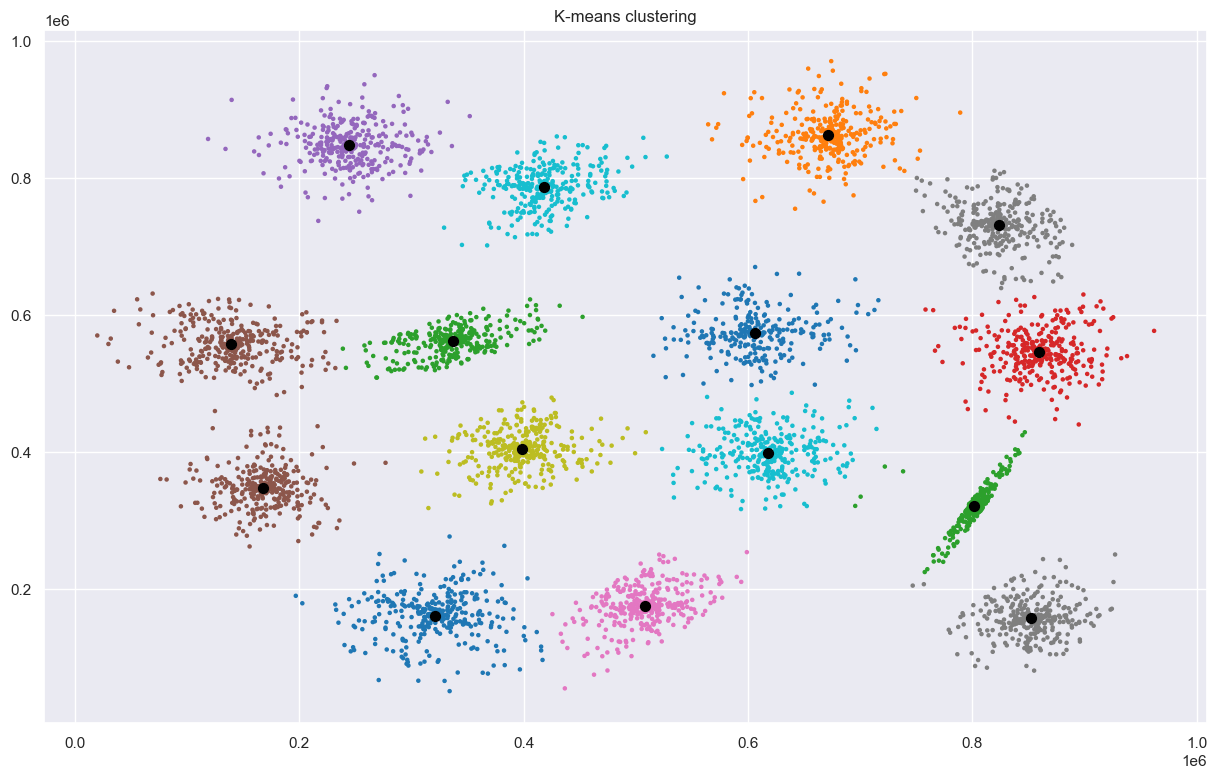

In [56]:
from sklearn.cluster import KMeans
plot1 = KMeans(n_clusters=15, n_init=10).fit(arr) 
labels = plot1.labels_
centroids = plot1.cluster_centers_
cmap = plt.get_cmap("tab10")
plt.scatter(arr[:, 0], arr[:, 1], c = labels, s=5, cmap = cmap) 
plt.scatter(centroids[:, 0], centroids[:, 1], s=50, color = 'black') 

plt.title('K-means clustering')

# Agglomerative clustering 

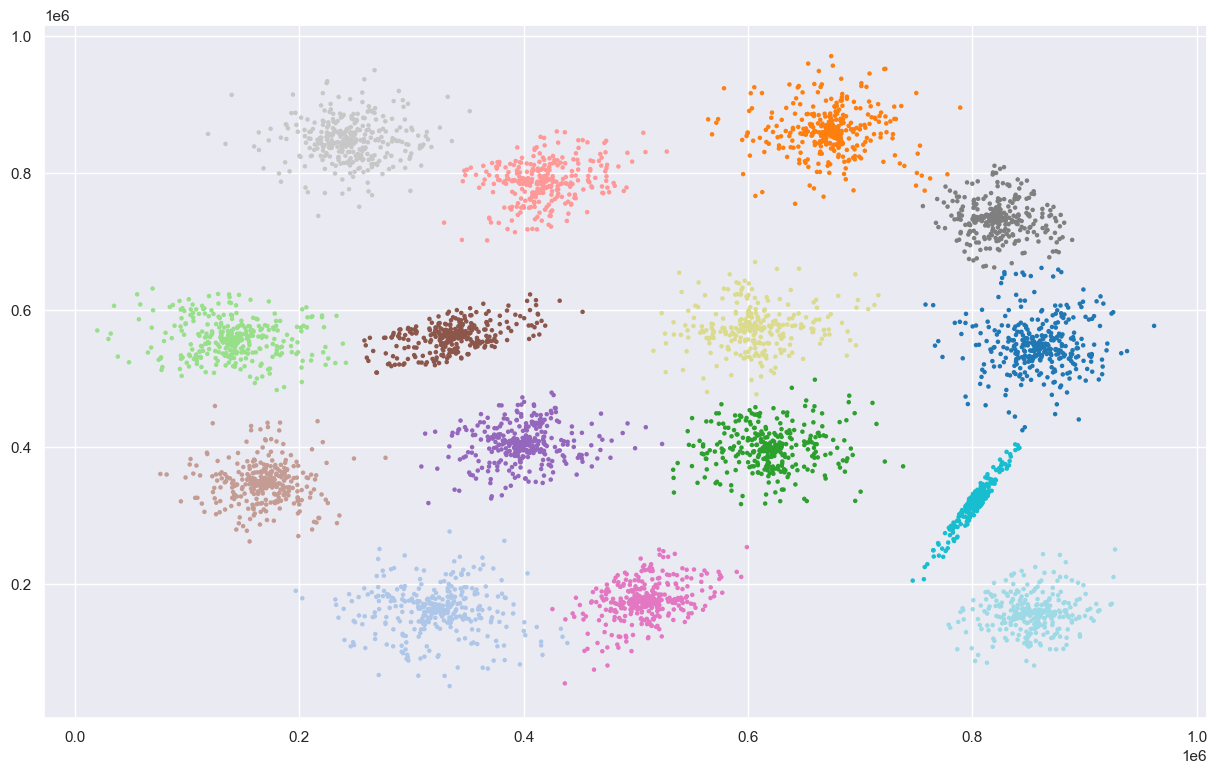

In [75]:
from sklearn.cluster import AgglomerativeClustering
plot2 = AgglomerativeClustering(n_clusters = 15).fit(arr)
labels2 = plot2.labels_
cmap = plt.get_cmap("tab20")
plt.scatter(arr[:,0], arr[:,1], c = labels2, s = 5, cmap = cmap)

plt.show()

## Dendrogram

Text(0.5, 1.0, 'Dendrogram')

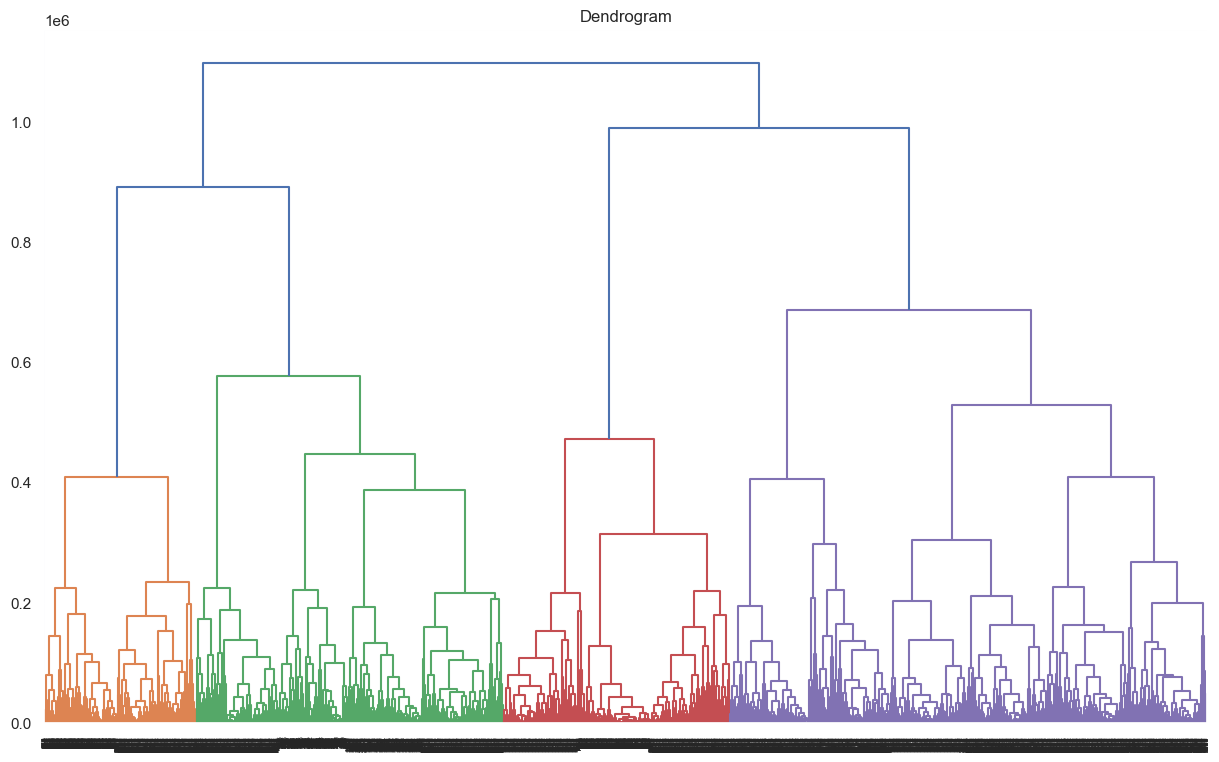

In [51]:
linkage_matrix = hierarchy.linkage(arr, method='complete', metric='euclidean')
cluster_labels = hierarchy.fcluster(linkage_matrix, 15, criterion='maxclust')

hierarchy.dendrogram(linkage_matrix, show_leaf_counts=True)
plt.title('Dendrogram')


# Affinity Propagation

In [82]:
from sklearn.cluster import AffinityPropagation

plot3 = AffinityPropagation(preference=-1e12, damping=0.9).fit(arr)
labels3 = plot3.labels_
centroids2 = plot3.cluster_centers_

n_clusters_ = len(plot3.cluster_centers_indices_)
print(n_clusters_)


15


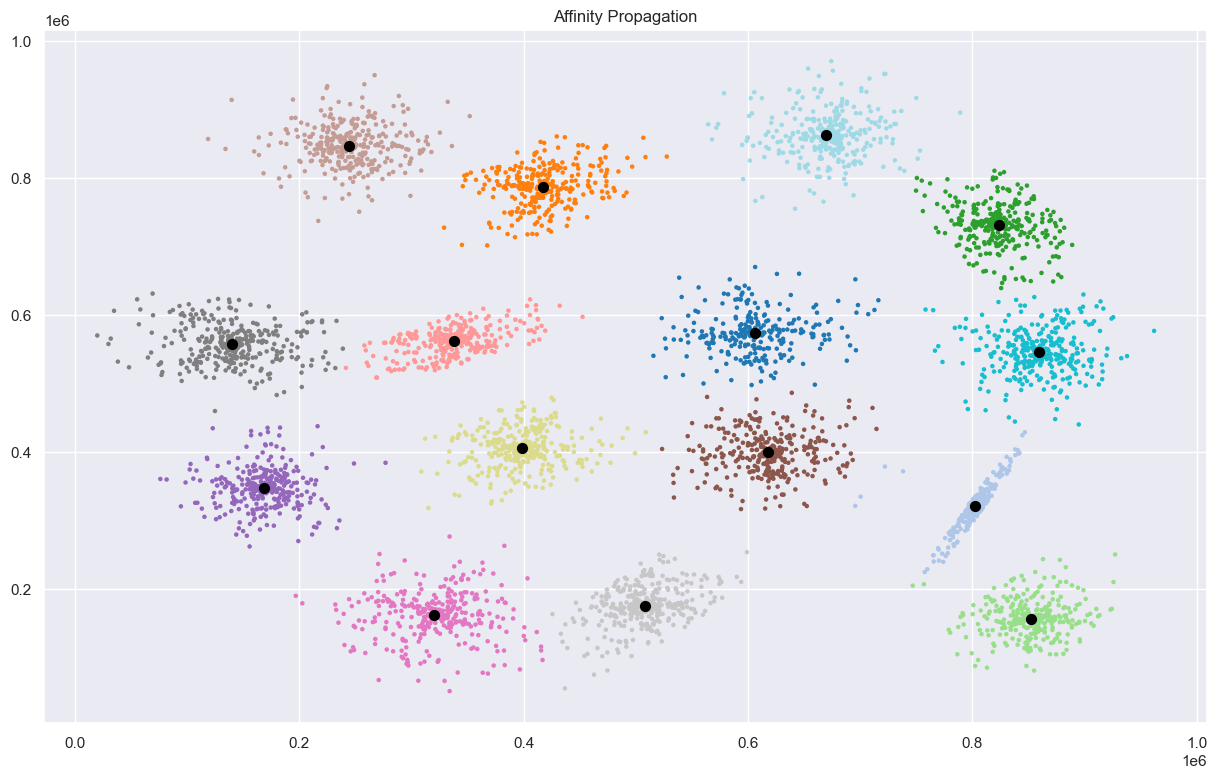

In [76]:
cmap = plt.get_cmap("tab20")
plt.scatter(arr[:, 0], arr[:, 1], c = labels3 , s=5, cmap=cmap) 
plt.scatter(centroids2[:, 0], centroids2[:, 1], s=50, color = "black")
plt.title('Affinity Propagation')
plt.show()

# MeanShift

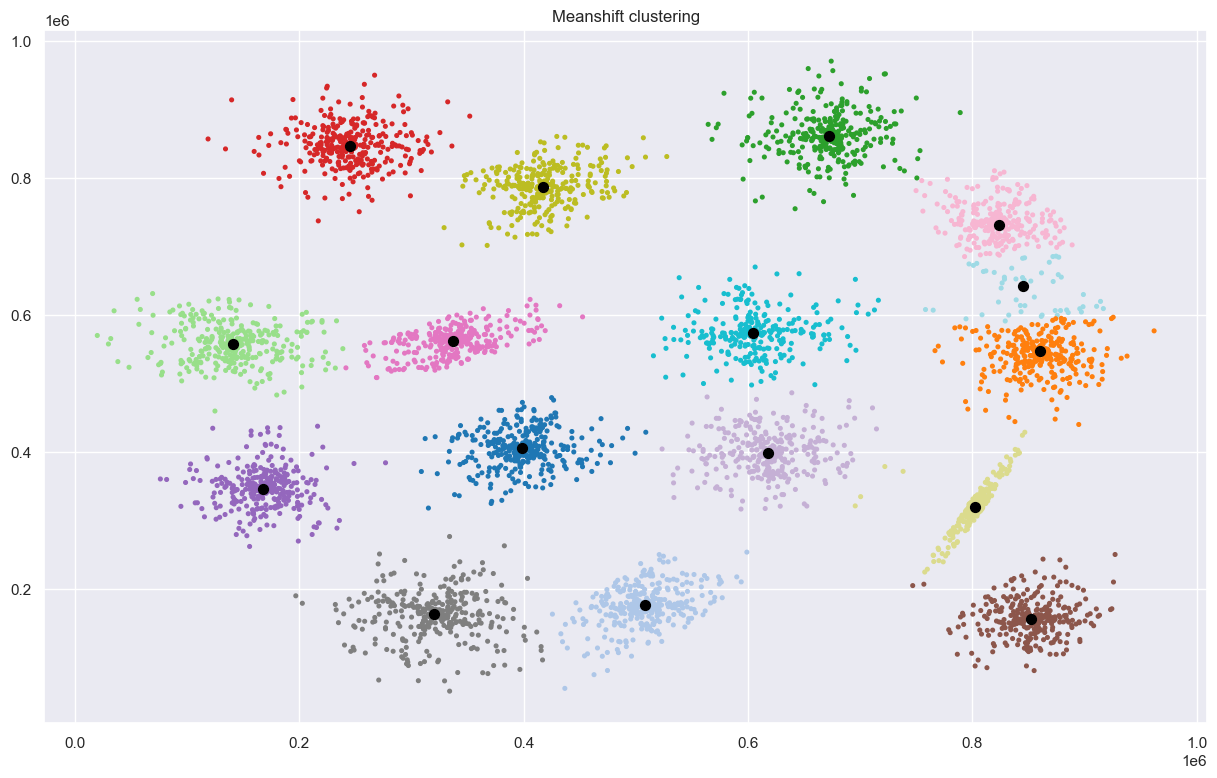

In [77]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(arr, quantile = 0.06, n_samples = 5000)
plot4 = MeanShift(bandwidth=bandwidth).fit(arr)

labels4 = plot4.labels_
centroids3 = plot4.cluster_centers_
cmap = plt.get_cmap("tab20")
plt.scatter(arr[:, 0], arr[:, 1], c = labels4, s=7, cmap=cmap)
plt.scatter(centroids3[:, 0], centroids3[:, 1],s = 50, color = "black") 

plt.title("Meanshift clustering")
plt.show()

# DBSCAN

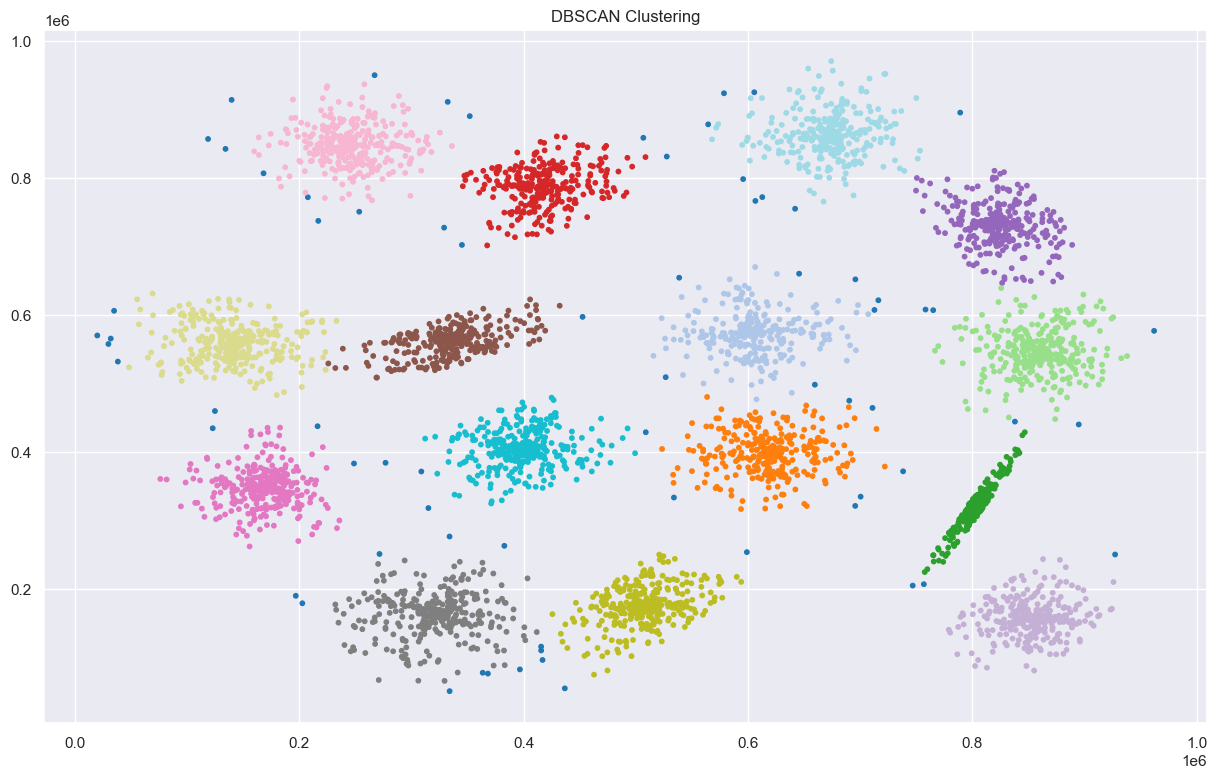

In [79]:
from sklearn.cluster import DBSCAN

plot5 = DBSCAN(eps=35000, min_samples=20).fit(arr)
labels5 = plot5.labels_
centroids4 = plot5.components_
n_noise = list(labels5).count(-1)
cmap = plt.get_cmap("tab20")
plt.scatter(arr[:, 0], arr[:, 1], c=labels5, s=10, cmap=cmap)
plt.title('DBSCAN Clustering')
plt.show()
